In [1]:
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

# Multiple Linear Regression

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset_dummies = pd.get_dummies(dataset, columns=['State'])

In [6]:
dataset_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [73]:
#X = dataset_dummies.drop(columns=['Profit', 'State_California']).values
X = dataset_dummies.drop(columns=['Profit']).values
y = dataset_dummies.Profit.values

In [74]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [75]:
# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [76]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [78]:
inter = regressor.intercept_
coeffs = regressor.coef_

In [40]:
dataset.sample(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
24,77044.01,99281.34,140574.81,New York,108552.04


In [45]:
X_train[:3]

array([[55494, 103057, 214635, 1, 0],
       [46014, 85047, 205518, 0, 1],
       [75329, 144136, 134050, 1, 0]])

In [15]:
import seaborn as sns

In [108]:
import statsmodels.api as sm
X_1=sm.add_constant(X_train)
ols_regr = sm.OLS(endog = y_train, exog = X_1).fit()

In [109]:
col_names = ['const']+pd.get_dummies(dataset.drop('Profit', axis=1)).columns.tolist()

In [110]:
ols_regr.summary(xname=col_names, yname='Profit')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 11 Mar 2020   Prob (F-statistic):           3.91e-21
Time:                        00:02:16   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.185e+04   6192.057      5.144      0.000    1.93e+04    4.44e+04
R&D Spend            0.7735      0.055     14.025      0.000       0.661       0.886
Administration       0.0329      0.066      0.495      0.624      -0.102       0.168
Marketing Spend      0.0366      0.019      1.884      0.068      -0.003       0.076
State_California   1.07e+04   2856.839      3.747      0.001    4897.725    1.65e+04
State_Florida     9744.2365   3477.506      2.802      0.008    2677.093    1.68e+04
State_New York     1.14e+04   2887.255      3.949      0.000    5535.281    1.73e+04
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     4.97e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.21e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [146]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [147]:
ols_regr.params

array([31850.647, 0.773, 0.033, 0.037, 10703.521, 9744.237, 11402.890])

In [149]:
b0 = ols_regr.params[0]
k1 = ols_regr.params[1]
k2 = ols_regr.params[2]
k3 = ols_regr.params[3]

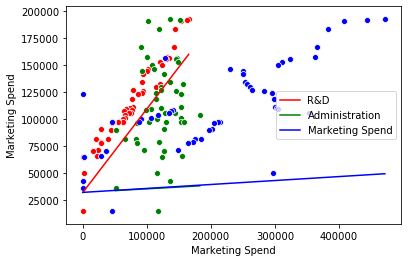

In [161]:
sns.scatterplot(x = dataset['R&D Spend'], y=dataset['Profit'], color='red')
sns.scatterplot(x = dataset['Administration'], y=dataset['Profit'], color='green')
sns.scatterplot(x = dataset['Marketing Spend'], y=dataset['Profit'], color='blue')
sns.lineplot(x=dataset['R&D Spend'],y=(dataset['R&D Spend'] * k1) + b0, color='red')
sns.lineplot(x=dataset['Administration'],y=(dataset['Administration'] * k2) + b0, color='green')
sns.lineplot(x=dataset['Marketing Spend'],y=(dataset['Marketing Spend'] * k3) + b0, color='blue')
plt.legend(['R&D','Administration','Marketing Spend'])

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
print('mean_squared_error: ',mean_squared_error(y_test, y_pred),
     '\nr2_score: ',r2_score(y_test, y_pred)
     )

mean_squared_error:  83502864.03257751 
r2_score:  0.9347068473282424


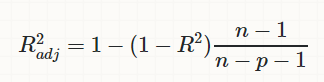

In [78]:
def adj_r2(r2score, train):
    adj_r2 = (1 - (1 - r2score) * ((train.shape[0] - 1) / 
          (train.shape[0] - train.shape[1] - 1)))
    return adj_r2

In [79]:
adj_r2(r2_score(y_test, y_pred), X_train)

0.9251049131118074

In [80]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X_ = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)

In [162]:
X_new = pd.get_dummies(dataset.drop('Profit', axis=1)).values

In [163]:
X_opt = X_new
X_opt[:3]

array([[165349, 136898, 471784, 0, 0, 1],
       [162598, 151378, 443899, 1, 0, 0],
       [153442, 101146, 407935, 0, 1, 0]])

In [164]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [165]:
regressor_OLS.summary(xname=pd.get_dummies(dataset.drop('Profit', axis=1)).columns.tolist(), yname='Profit')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.34e-27
Time:                        17:09:52   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [166]:
X_new = pd.get_dummies(dataset.drop(['Profit','Administration'], axis=1)).values

In [169]:
X_opt = X_new
X_opt[:3]

array([[165349, 471784, 0, 0, 1],
       [162598, 443899, 1, 0, 0],
       [153442, 407935, 0, 1, 0]])

In [170]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [171]:
regressor_OLS.summary(xname=pd.get_dummies(dataset.drop(['Profit','Administration'], axis=1)).columns.tolist(), yname='Profit')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           9.72e-29
Time:                        17:11:04   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
X_new = pd.get_dummies(dataset.drop(['Profit','Administration','Marketing Spend'], axis=1)).values

In [173]:
X_opt = X_new
X_opt[:3]

array([[165349, 0, 0, 1],
       [162598, 1, 0, 0],
       [153442, 0, 1, 0]])

In [174]:
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()

In [175]:
regressor_OLS.summary(xname=pd.get_dummies(dataset.drop(['Profit','Administration','Marketing Spend'], axis=1)).columns.tolist(), yname='Profit')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.76e-29
Time:                        17:12:18   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8530      0.030     28.226      0.000       0.792       0.914
State_California  4.875e+04   3040.118     16.036      0.000    4.26e+04    5.49e+04
State_Florida     4.991e+04   3422.664     14.584      0.000     4.3e+04    5.68e+04
State_New York    4.876e+04   3275.140     14.888      0.000    4.22e+04    5.54e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     2.90e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
X_new = pd.get_dummies(dataset.drop(['Profit','Administration'], axis=1)).values

In [179]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.2, random_state = 0)

In [180]:
regressor_new = LinearRegression()

In [181]:
regressor_new.fit(X_train_new, y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
y_preds_new = regressor_new.predict(X_test_new)

In [183]:
r2_score(y_preds_new, y_test_new)

0.9414615124972677

In [184]:
adj_r2(r2_score(y_preds_new, y_test_new), X_train_new)

0.9328529113939248

In [138]:
import seaborn as sns

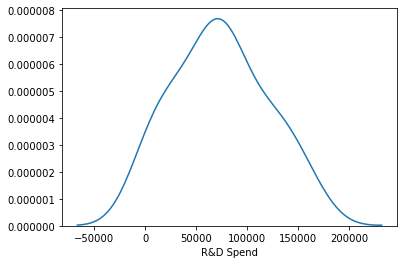

In [143]:
sns.distplot(dataset['R&D Spend'], hist = False)

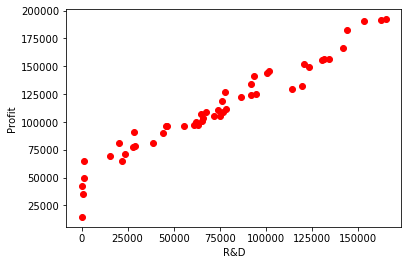

In [96]:
plt.scatter(X[:,0],y, color='red')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.show()

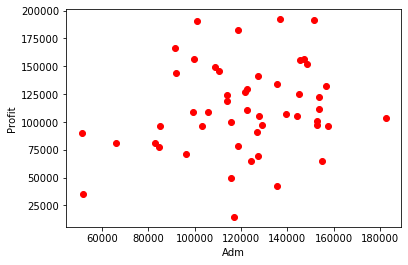

In [99]:
plt.scatter(X[:,1],y, color='red')
plt.xlabel('Adm')
plt.ylabel('Profit')
plt.show()

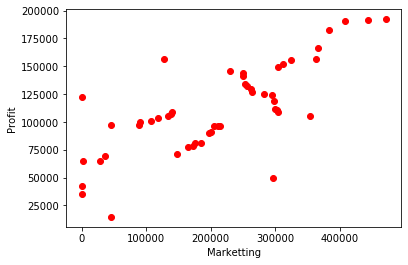

In [100]:
plt.scatter(X[:,2],y, color='red')
plt.xlabel('Marketting')
plt.ylabel('Profit')
plt.show()

In [54]:
regressor.coef_

array([-959, 699, 1, 0, 0])

In [55]:
regressor.intercept_

42554.1676177278

In [68]:
X[:4,3:4]

array([[165349],
       [162598],
       [153442],
       [144372]])

In [58]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [76]:
x_min = np.min(X[:,3:4])
x_max = np.max(X[:,3:4])

In [77]:
x_set = np.linspace(x_min, x_max, 1000)

In [79]:
regressor.coef_[0]

-959.2841600569366

In [91]:
y_set=regressor.intercept_ + x_set*regressor.coef_[1]

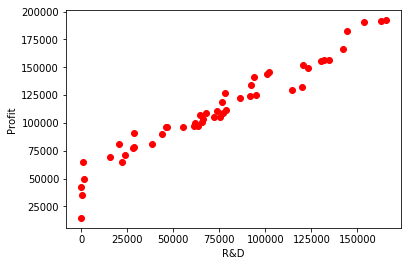

In [88]:
plt.scatter(X[:,3:4],y, color='red')
#plt.plot(x_set, y_set, color='blue')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.show()

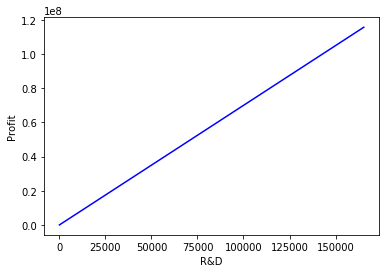

In [92]:
#plt.scatter(X[:,3:4],y, color='red')
plt.plot(x_set, y_set, color='blue')
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.show()

In [90]:
y_set

array([0, 115756, 231512, 347268, 463023, 578779, 694535, 810291, 926047,
       1041803, 1157559, 1273315, 1389070, 1504826, 1620582, 1736338,
       1852094, 1967850, 2083606, 2199362, 2315117, 2430873, 2546629,
       2662385, 2778141, 2893897, 3009653, 3125408, 3241164, 3356920,
       3472676, 3588432, 3704188, 3819944, 3935700, 4051455, 4167211,
       4282967, 4398723, 4514479, 4630235, 4745991, 4861747, 4977502,
       5093258, 5209014, 5324770, 5440526, 5556282, 5672038, 5787793,
       5903549, 6019305, 6135061, 6250817, 6366573, 6482329, 6598085,
       6713840, 6829596, 6945352, 7061108, 7176864, 7292620, 7408376,
       7524131, 7639887, 7755643, 7871399, 7987155, 8102911, 8218667,
       8334423, 8450178, 8565934, 8681690, 8797446, 8913202, 9028958,
       9144714, 9260470, 9376225, 9491981, 9607737, 9723493, 9839249,
       9955005, 10070761, 10186516, 10302272, 10418028, 10533784,
       10649540, 10765296, 10881052, 10996808, 11112563, 11228319,
       11344075, 114598

In [95]:
regressor.singular_

array([810969, 214655, 134523, 3, 2])